In [24]:
import os
import random

from PIL import Image

import numpy as np
import pandas as pd
from skimage.measure import block_reduce
from skimage.color import rgb2gray

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from utils import *

In [2]:
PATH_TO_TRAINING_DATA = 'data/train/'
PATH_TO_TEST_DATA = 'data/test/'
PATH_TO_VALID_DATA = 'data/valid/'

In [3]:
%%time
# Load training images and labels. Print shapes
X_train, y_train = load_data(PATH_TO_TRAINING_DATA)
print("Shape of training images ", X_train.shape)
print("Shape of training labels ", y_train.shape)

# Load validation images and labels. Print shapes
X_val, y_val = load_data(PATH_TO_VALID_DATA)
print("Shape of validation images ", X_val.shape)
print("Shape of validation labels ", y_val.shape)

# Load test images and labels. Print shapes
X_test, y_test = load_data(PATH_TO_TEST_DATA)
print("Shape of test images ", X_test.shape)
print("Shape of test labels ", y_test.shape)

NameError: name 'load_data' is not defined

In [4]:
PATH_TO_TRAINING_DATA = 'data/train/'
PATH_TO_VALID_DATA = 'data/valid/'
PATH_TO_TEST_DATA = 'data/test/'

# Load Data

In [6]:
nowildfire_names = os.listdir(PATH_TO_TRAINING_DATA + 'nowildfire/')
wildfire_names = os.listdir(PATH_TO_TRAINING_DATA + 'wildfire/')

## Downsample Images

In [7]:
DOWNSAMPLE_FACTOR = 7

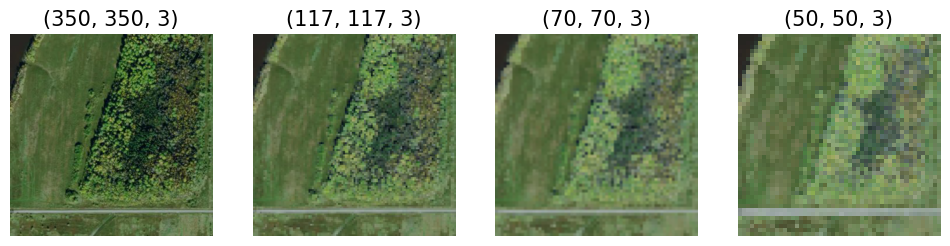

In [157]:
rand_img = random.sample(wildfire_names, 1)
file_name = rand_img[0]
path = PATH_TO_TRAINING_DATA + 'wildfire/' + file_name

fig, axs = plt.subplots(1, 4, figsize=(12, 6))
downsample_factors = [1, 3, 5, 7]

for i in range(len(downsample_factors)):
    img = mpimg.imread(path)
    img_reduced = block_reduce(img, block_size=(downsample_factors[i], downsample_factors[i], 1), func=np.max)
    dim = str(img_reduced.shape[0])
    axs[i].imshow(img_reduced)
    axs[i].set_title('({dim}, {dim}, 3)'.format(dim=dim), size=15)
    axs[i].axis('off')


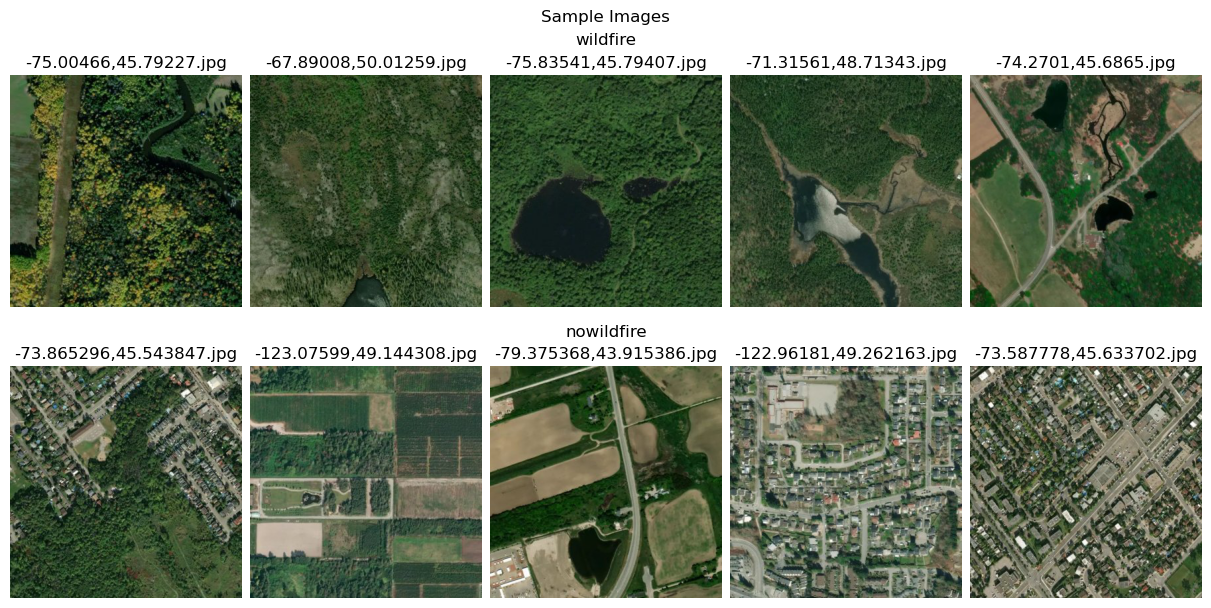

In [8]:
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
fig.suptitle('Sample Images')

labels = ['wildfire', 'nowildfire']
samples = {'wildfire': random.sample(wildfire_names, 5),
           'nowildfire': random.sample(nowildfire_names, 5)}

subfigs = fig.subfigures(nrows=2, ncols=1)

for row, subfig in enumerate(subfigs):
    label = labels[row]
    subfig.suptitle(label)

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=5)
    for col, ax in enumerate(axs):
        file_name = samples[label][col]
        path = PATH_TO_TRAINING_DATA + label + '/' + file_name
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(file_name)
        ax.axis('off')

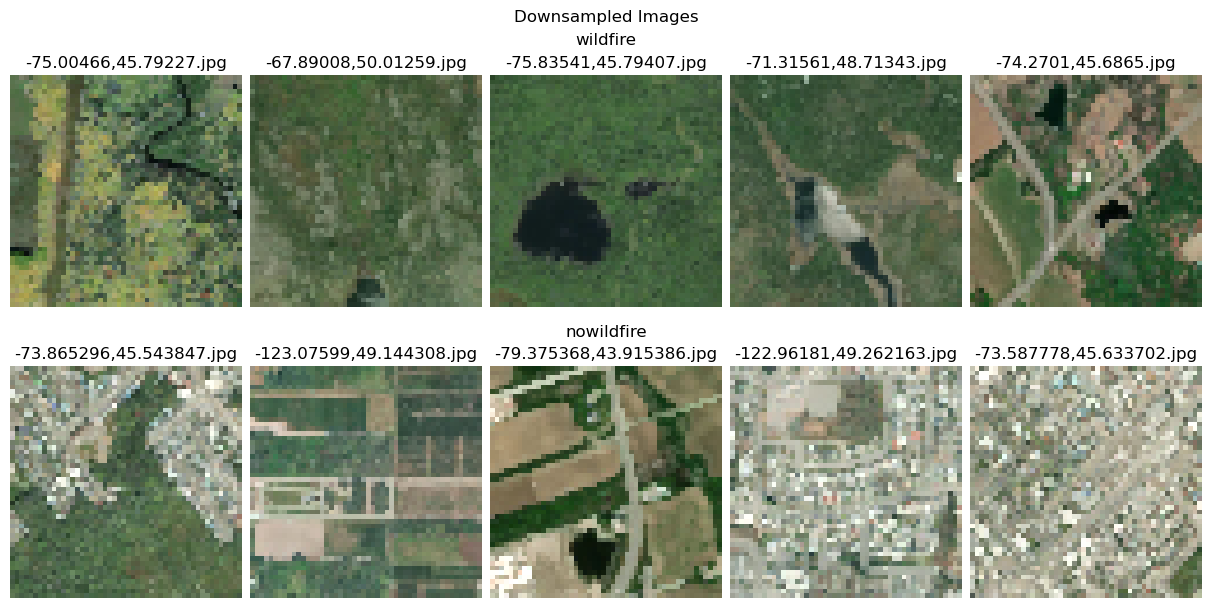

In [9]:
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
fig.suptitle('Downsampled Images')

subfigs = fig.subfigures(nrows=2, ncols=1)

for row, subfig in enumerate(subfigs):
    label = labels[row]
    subfig.suptitle(label)

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=5)
    for col, ax in enumerate(axs):
        file_name = samples[label][col]
        path = PATH_TO_TRAINING_DATA + label + '/' + file_name
        img = mpimg.imread(path)
        img_reduced = block_reduce(img, block_size=(DOWNSAMPLE_FACTOR, DOWNSAMPLE_FACTOR, 1), func=np.max)
        #print(img, img_reduced)
        ax.imshow(img_reduced)
        ax.set_title(file_name)
        ax.axis('off')

## Load Train, Val, and Test Data

In [10]:
%%time

X_train, y_train = load_data(PATH_TO_TRAINING_DATA, DOWNSAMPLE_FACTOR=DOWNSAMPLE_FACTOR)
print("Shape of training images ", X_train.shape)
print("Shape of training labels ", y_train.shape)

X_val, y_val = load_data(PATH_TO_VALID_DATA, DOWNSAMPLE_FACTOR=DOWNSAMPLE_FACTOR)
print("Shape of validation images ", X_val.shape)
print("Shape of validation labels ", y_val.shape)

X_test, y_test = load_data(PATH_TO_TEST_DATA, DOWNSAMPLE_FACTOR=DOWNSAMPLE_FACTOR)
print("Shape of test images ", X_test.shape)
print("Shape of test labels ", y_test.shape)

3 images failed to load.
Shape of training images  (30249, 50, 50, 3)
Shape of training labels  (30249,)
2 images failed to load.
Shape of validation images  (6300, 50, 50, 3)
Shape of validation labels  (6300,)
3 images failed to load.
Shape of test images  (6299, 50, 50, 3)
Shape of test labels  (6299,)
CPU times: user 6min 49s, sys: 16.6 s, total: 7min 6s
Wall time: 7min 27s


# Exploratory Data Analysis

## Class Balance

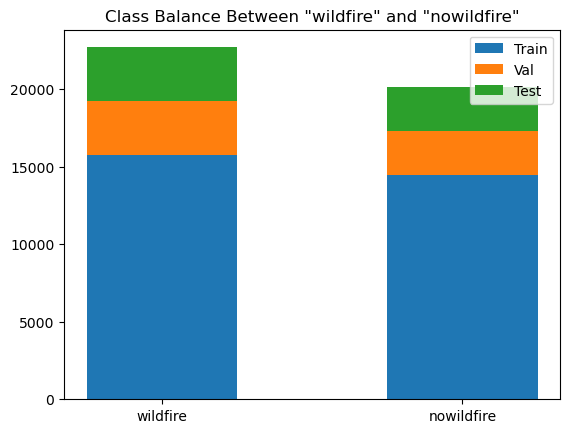

In [168]:
weight_counts = {
    "Train": np.array([np.count_nonzero(y_train == 'wildfire'), np.count_nonzero(y_train == 'nowildfire')]),
    "Val": np.array([np.count_nonzero(y_val == 'wildfire'), np.count_nonzero(y_val == 'nowildfire')]),
    "Test": np.array([np.count_nonzero(y_val == 'wildfire'), np.count_nonzero(y_val == 'nowildfire')]),
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(['wildfire', 'nowildfire'], weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title('Class Balance Between "wildfire" and "nowildfire"')
ax.legend(loc="upper right")

plt.show()

## RGB Distribution

In [12]:
images_reshaped = X_train.reshape(X_train.shape[0], -1, X_train.shape[-1])
avg_values = np.mean(images_reshaped, axis=1)

wildfire_indices = np.where(y_train == 'wildfire')
avg_values_wildfire = avg_values[wildfire_indices]

nowildfire_indices = np.where(y_train == 'nowildfire')
avg_values_nowildfire = avg_values[nowildfire_indices]

/Users/MarlonFu/opt/anaconda3/envs/207/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/MarlonFu/opt/anaconda3/envs/207/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/MarlonFu/opt/anaconda3/envs/207/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/MarlonFu/opt/anaconda3/envs/207/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

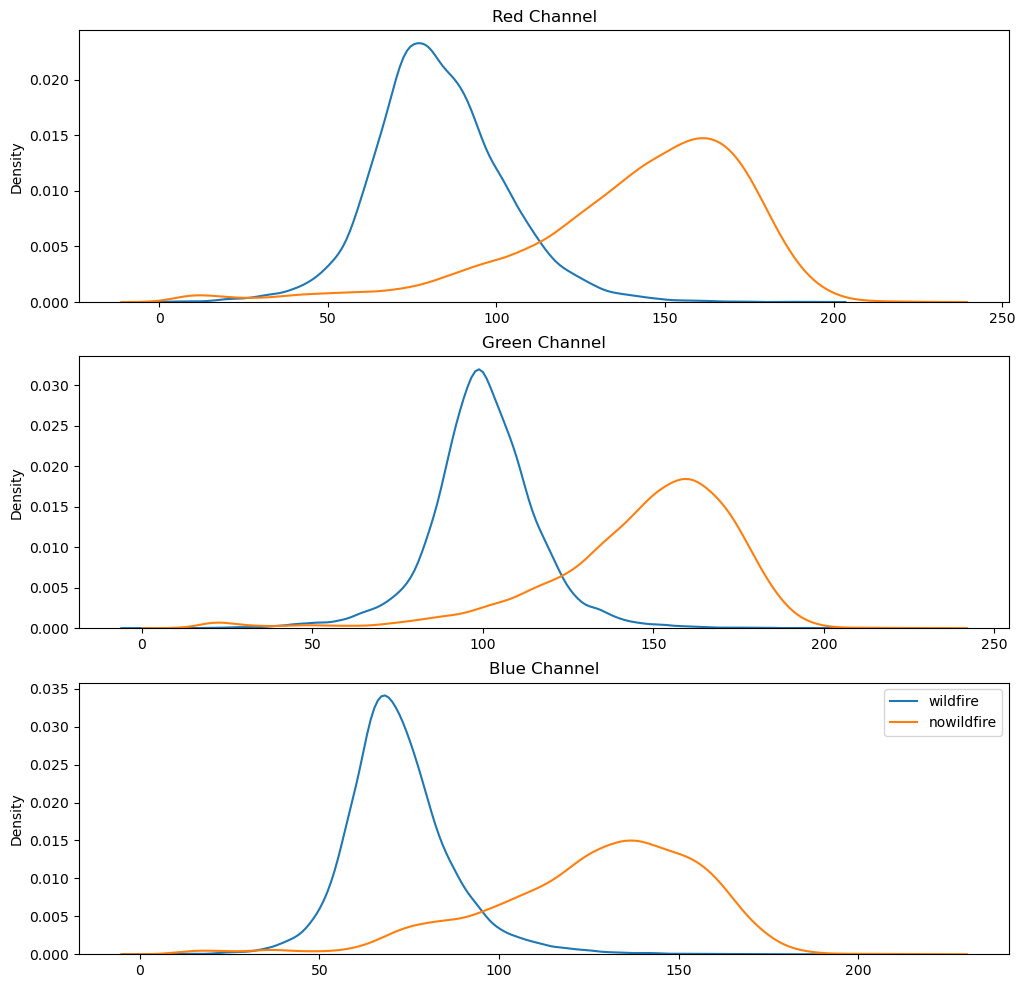

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

channels = ['Red Channel', 'Green Channel', 'Blue Channel']
for i in range(len(channels)):
    channel = channels[i]
    axs[i].hist(avg_values_wildfire[:,i], label='wildfire')
    axs[i].hist(avg_values_nowildfire[:,i], label='nowildfire')
    #sns.kdeplot(ax=axs[i], data=avg_values_wildfire[:,i], label='wildfire')
    #sns.kdeplot(ax=axs[i], data=avg_values_nowildfire[:,i], label='nowildfire')
    axs[i].set_title(channel)

plt.legend()
plt.show()

# Feature Extraction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#from utils import fit_transform_PCA
#from utils import transform_PCA

## Flattened Pixel Values

In [15]:
flattened_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
flattened_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2] * X_val.shape[3])
flattened_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

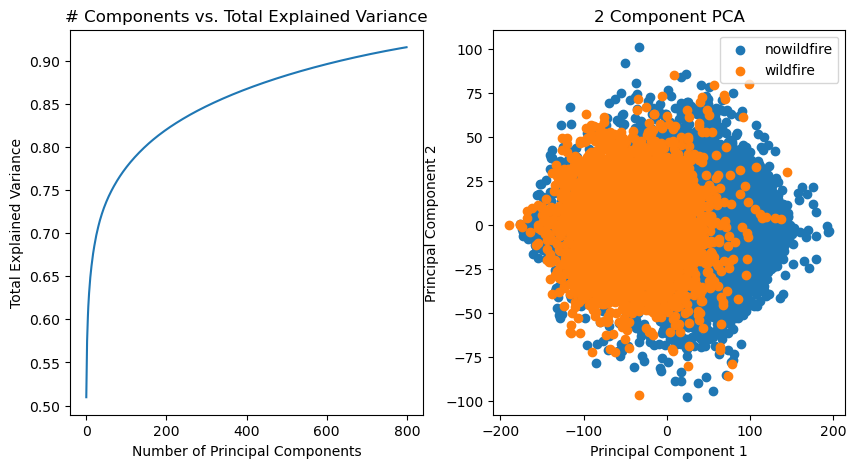

636 out of 7500 components needed to exceed a total explained variance of 0.9
CPU times: user 6min 35s, sys: 15.7 s, total: 6min 51s
Wall time: 1min 9s


In [16]:
%%time

flattened_train, flattened_pca, flattened_sc = fit_transform_PCA(flattened_train, y_train, max_components=800)

flattened_val, flattened_test = transform_PCA(flattened_pca, flattened_sc, flattened_val, flattened_test)

## MobileNetV2 Extracted Features

In [147]:
from tensorflow.keras.applications import MobileNetV2
# Extract features using a pre-trained model
MobileNetV2_base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
MobileNetV2_feature_extractor = tf.keras.Model(inputs=MobileNetV2_base_model.input,
                                               outputs=MobileNetV2_base_model.output)

# MobilNetV2 input can only be a few shapes, including (224, 224), so we will resize 
MobileNetV2_train = MobileNetV2_feature_extractor.predict(resize_imgs(X_train))
MobileNetV2_val = MobileNetV2_feature_extractor.predict(resize_imgs(X_val))
MobileNetV2_test = MobileNetV2_feature_extractor.predict(resize_imgs(X_test))

MobileNetV2_train = MobileNetV2_train.reshape((MobileNetV2_train.shape[0], MobileNetV2_train.shape[1] * MobileNetV2_train.shape[2] * MobileNetV2_train.shape[3]))
MobileNetV2_val = MobileNetV2_val.reshape((MobileNetV2_val.shape[0], MobileNetV2_val.shape[1] * MobileNetV2_val.shape[2] * MobileNetV2_val.shape[3]))
MobileNetV2_test = MobileNetV2_test.reshape((MobileNetV2_test.shape[0], MobileNetV2_test.shape[1] * MobileNetV2_test.shape[2] * MobileNetV2_test.shape[3]))

197/197 [==============================] - 219s 1s/step


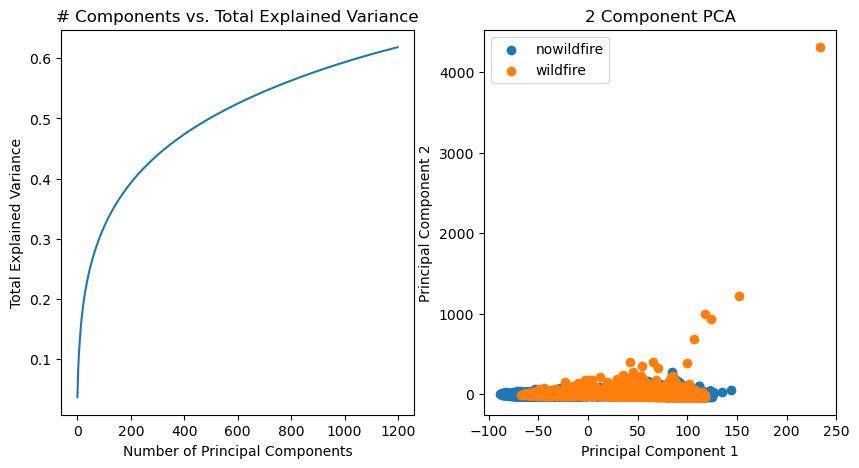

1200 out of 62720 components needed to exceed a total explained variance of 0.61857426
CPU times: user 1h 36min 30s, sys: 7min 28s, total: 1h 43min 58s
Wall time: 20min 54s


In [148]:
%%time
MobileNetV2_train, MobileNetV2_pca, MobileNetV2_sc = fit_transform_PCA(MobileNetV2_train, y_train, max_components=1200)
MobileNetV2_val, MobileNetV2_test = transform_PCA(MobileNetV2_pca, MobileNetV2_sc, MobileNetV2_val, MobileNetV2_test)

## ResNet50 Extracted Featrues

In [161]:
%%time
from tensorflow.keras.applications import ResNet50
ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))
ResNet50_feature_extractor = tf.keras.Model(inputs=ResNet50_base_model.input, 
                                            outputs=ResNet50_base_model.output)

ResNet50_train = ResNet50_feature_extractor.predict(X_train)
ResNet50_val = ResNet50_feature_extractor.predict(X_val)
ResNet50_test = ResNet50_feature_extractor.predict(X_test)

ResNet50_train = ResNet50_train.reshape((ResNet50_train.shape[0], ResNet50_train.shape[1] * ResNet50_train.shape[2] * ResNet50_train.shape[3]))
ResNet50_val = ResNet50_val.reshape((ResNet50_val.shape[0], ResNet50_val.shape[1] * ResNet50_val.shape[2] * ResNet50_val.shape[3]))
ResNet50_test = ResNet50_test.reshape((ResNet50_test.shape[0], ResNet50_test.shape[1] * ResNet50_test.shape[2] * ResNet50_test.shape[3]))                             

197/197 [==============================] - 31s 156ms/step
CPU times: user 13min 51s, sys: 3min 7s, total: 16min 58s
Wall time: 3min


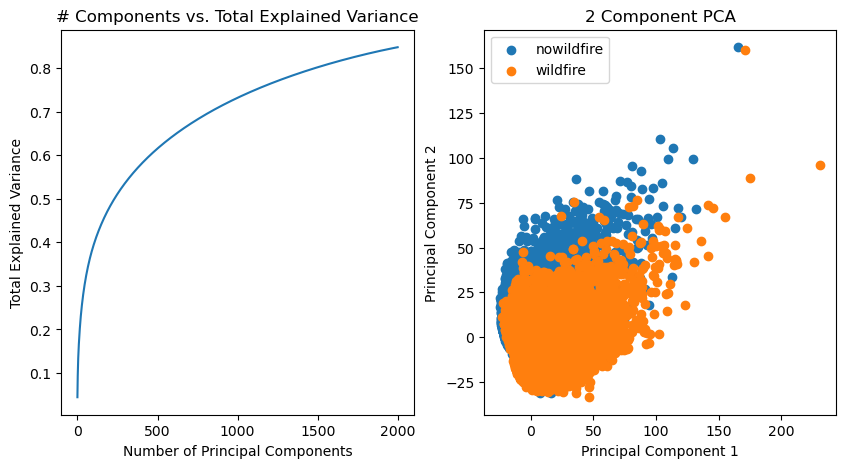

2000 out of 8192 components needed to exceed a total explained variance of 0.84790117
CPU times: user 9min 49s, sys: 12.2 s, total: 10min 1s
Wall time: 1min 34s


In [162]:
%%time
ResNet50_train, ResNet50_pca, ResNet50_sc = fit_transform_PCA(ResNet50_train, y_train, max_components=2000)
ResNet50_val, ResNet50_test = transform_PCA(ResNet50_pca, ResNet50_sc, ResNet50_val, ResNet50_test)

# Logistic Regression

In [66]:
%%time

from sklearn.linear_model import LogisticRegression
logreg =  LogisticRegression(max_iter=2000)
logreg.fit(ResNet50_train, y_train)

CPU times: user 22.5 s, sys: 528 ms, total: 23.1 s
Wall time: 3.05 s


LogisticRegression(max_iter=2000)

In [120]:
train_predictions = logreg.predict(ResNet50_train)
val_predictions = logreg.predict(ResNet50_val)
test_predictions = logreg.predict(ResNet50_test)

print('Train Accuracy:')
compute_metrics(y_train, train_predictions)
print('-------------------')
print('Validation Accuracy:')
compute_metrics(y_val, val_predictions)
print('-------------------')
print('Test Accuracy:')
compute_metrics(y_test, test_predictions)
print('-------------------')

Train Accuracy:
Accuracy: 0.9465767463387219
Precision: 0.94480110775428
Recall: 0.9530793650793651
F1: 0.948922182185979
F2: 0.9514121285873646
-------------------
Validation Accuracy:
Accuracy: 0.9355555555555556
Precision: 0.9481049562682216
Recall: 0.9344827586206896
F1: 0.9412445730824891
F2: 0.9371757925072045
-------------------
Test Accuracy:
Accuracy: 0.945070646134307
Precision: 0.9605998235812996
Recall: 0.9390629491233113
F1: 0.9497093023255814
F2: 0.9432927181382456
-------------------


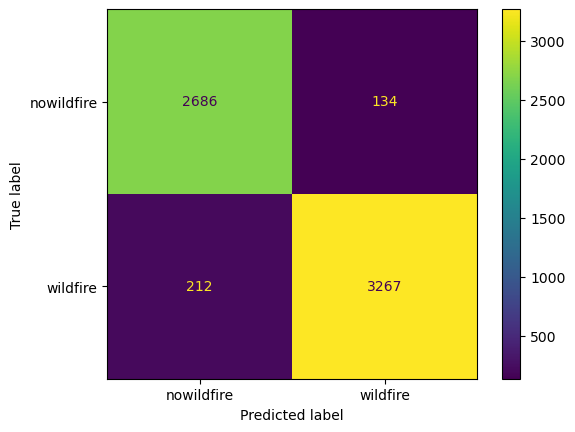

In [77]:
plot_confusion_matrix(logreg, y_test, test_predictions)

# SVM

In [84]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=100.0, random_state=42, max_iter=2000)
svm.fit(ResNet50_train, y_train)

/Users/MarlonFu/opt/anaconda3/envs/207/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100.0, max_iter=2000, random_state=42)

In [121]:
train_predictions = svm.predict(ResNet50_train)
val_predictions = svm.predict(ResNet50_val)
test_predictions = svm.predict(ResNet50_test)

print('Train Accuracy:')
compute_metrics(y_train, train_predictions)
print('-------------------')
print('Validation Accuracy:')
compute_metrics(y_val, val_predictions)
print('-------------------')
print('Test Accuracy:')
compute_metrics(y_test, test_predictions)
print('-------------------')

Train Accuracy:
Accuracy: 0.9084597837945056
Precision: 0.9062402203167053
Recall: 0.9193015873015873
F1: 0.9127241781447978
F2: 0.9166592805500335
-------------------
Validation Accuracy:
Accuracy: 0.9049206349206349
Precision: 0.921322023983621
Recall: 0.9051724137931034
F1: 0.9131758225829829
F2: 0.9083568833266046
-------------------
Test Accuracy:
Accuracy: 0.9183997459914273
Precision: 0.9374446739451165
Recall: 0.9131934463926416
F1: 0.9251601630751312
F2: 0.9179427911008379
-------------------


# ResNet50

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

In [86]:
# The labels need to be converted to integers from strings
resnet_y_train = np.where(y_train == 'wildfire', 1, 0)
resnet_y_val = np.where(y_val == 'wildfire', 1, 0)
resnet_y_test = np.where(y_test == 'wildfire', 1, 0)

In [87]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=2,
    mode='max',
    restore_best_weights=True
)

In [90]:
# Load pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the pre-trained ResNet50
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24112513 (91.98 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
___________

In [91]:
# Train the model
history = model.fit(X_train, resnet_y_train, epochs=10, validation_data=(X_val, resnet_y_val), callbacks=[early_stopping])

Epoch 1/10
946/946 [==============================] - 192s 198ms/step - loss: 0.2153 - accuracy: 0.9197 - val_loss: 0.1676 - val_accuracy: 0.9402
Epoch 2/10
946/946 [==============================] - 218s 231ms/step - loss: 0.1650 - accuracy: 0.9372 - val_loss: 0.1528 - val_accuracy: 0.9414
Epoch 3/10
946/946 [==============================] - 247s 262ms/step - loss: 0.1478 - accuracy: 0.9425 - val_loss: 0.1384 - val_accuracy: 0.9483
Epoch 4/10
946/946 [==============================] - 257s 272ms/step - loss: 0.1405 - accuracy: 0.9470 - val_loss: 0.1381 - val_accuracy: 0.9490
Epoch 5/10
946/946 [==============================] - 273s 288ms/step - loss: 0.1303 - accuracy: 0.9511 - val_loss: 0.1418 - val_accuracy: 0.9500
Epoch 6/10
946/946 [==============================] - 248s 262ms/step - loss: 0.1235 - accuracy: 0.9527 - val_loss: 0.1368 - val_accuracy: 0.9495
Epoch 7/10
946/946 [==============================] - 246s 260ms/step - loss: 0.1173 - accuracy: 0.9544 - val_loss: 0.1304 -

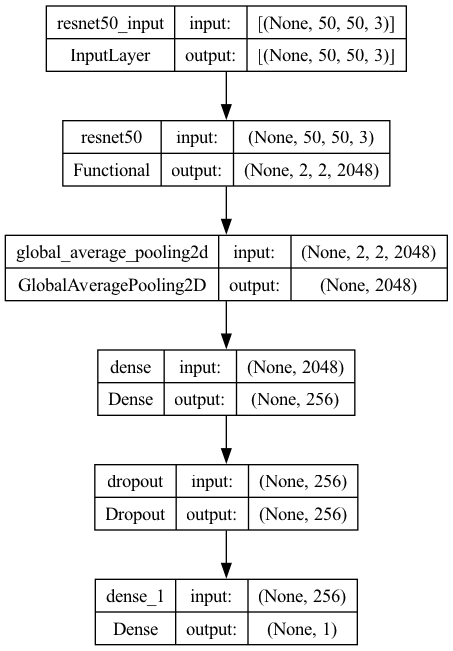

In [92]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [159]:
epochs = range(10)
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

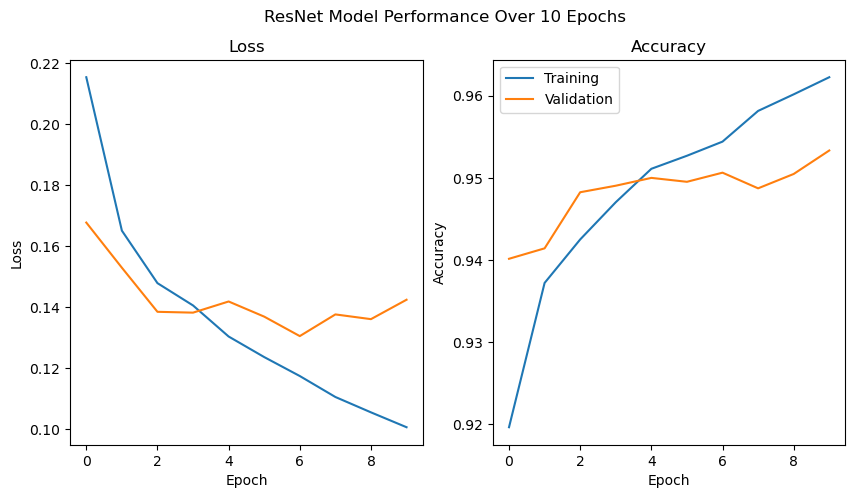

In [160]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('ResNet Model Performance Over 10 Epochs')

axs[0].plot(epochs, loss, label='Training')
axs[0].plot(epochs, val_loss, label='Validation')
axs[0].title.set_text('Loss')
axs[0].set(ylabel='Loss')
axs[0].set(xlabel='Epoch')

axs[1].plot(epochs, accuracy, label='Training')
axs[1].plot(epochs, val_accuracy, label='Validation')
axs[1].title.set_text('Accuracy')
axs[1].set(ylabel='Accuracy')
axs[1].set(xlabel='Epoch')

plt.legend()
plt.show()

In [122]:
# Evaluate the model
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

threshold = 0.5
train_predictions = np.where(train_predictions > threshold, 1, 0)
val_predictions = np.where(val_predictions > threshold, 1, 0)
test_predictions = np.where(test_predictions > threshold, 1, 0)

label_mapping = ["nowildfire", "wildfire"]

print('Train Accuracy:')
compute_metrics(y_train, [label_mapping[label[0]] for label in train_predictions])
print('-------------------')
print('Validation Accuracy:')
compute_metrics(y_val, [label_mapping[label[0]] for label in val_predictions])
print('-------------------')
print('Test Accuracy:')
compute_metrics(y_test, [label_mapping[label[0]] for label in test_predictions])
print('-------------------')

197/197 [==============================] - 32s 162ms/step
Train Accuracy:
Accuracy: 0.9731230784488744
Precision: 0.9680391050949426
Recall: 0.9807619047619047
F1: 0.9743589743589743
F2: 0.9781906607393899
-------------------
Validation Accuracy:
Accuracy: 0.9533333333333334
Precision: 0.9601386481802426
Recall: 0.9551724137931035
F1: 0.9576490924805532
F2: 0.9561615464273387
-------------------
Test Accuracy:
Accuracy: 0.9614224480076202
Precision: 0.9684423856398379
Recall: 0.961483184823225
F1: 0.9649502379922111
F2: 0.9628670120898101
-------------------


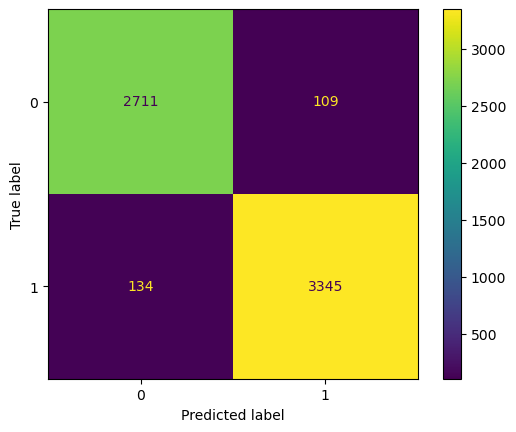

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, [label_mapping[label[0]] for label in test_predictions])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()